In [1]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
import pandas as pd

PAT = pd.read_csv('PAT.txt', sep = "\n", engine='python')
APG = pd.read_csv('APG.txt', sep = "\n", engine='python')
APG_itv = pd.read_csv('APG_itv.txt', sep = "\n", engine='python')
R = pd.read_csv('R.txt', sep = "\n", engine='python')
R_itv = pd.read_csv('R_itv.txt', sep = "\n", engine='python')

input_features = pd.concat([PAT, APG, APG_itv, R, R_itv], axis=1)

SBP = pd.read_csv('SBP.txt', sep = "\n", engine='python')
DBP = pd.read_csv('DBP.txt', sep = "\n", engine='python')

#ABP = pd.concat([SBP, DBP], axis = 1)
train_index = int(0.7*len(PAT))

x_train = input_features.iloc[:train_index]
x_test = input_features.iloc[train_index:]
sbp_train = SBP.iloc[:train_index]
sbp_test = SBP.iloc[train_index:]
dbp_train = DBP.iloc[:train_index]
dbp_test = DBP.iloc[train_index:]

In [8]:
print(input_features)
print(x_train.ndim)

          PAT     APG  APG_itv       R  R_itv
0       0.624  0.0153    0.208  0.8386  0.720
1       0.112  0.0902    1.232  0.8228  0.728
2       0.616  0.0190    0.832  0.6578  0.720
3       0.728  0.0256    0.624  0.4933  0.736
4       0.616  0.0188    0.736  0.4854  0.728
...       ...     ...      ...     ...    ...
137596  0.344  0.0040    0.408  0.8556  0.440
137597  0.312  0.0040    0.384  0.7776  0.432
137598  0.264  0.0040    0.560  0.8174  0.352
137599  0.472  0.0040    0.376  0.7289  0.536
137600  0.312  0.0039    0.088  0.7543  0.360

[137601 rows x 5 columns]
2


In [12]:
###first
x_input = Input(shape=(5,), name='x_input')
x = layers.Dense(64, activation='relu')(x_input)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
sbp_prediction  = layers.Dense(1, name='SBP')(x)
dbp_prediction = layers.Dense(1, name='DBP')(x)

model = models.Model(x_input, [sbp_prediction, dbp_prediction])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_input (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 64)           384         x_input[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 64)           4160        dense_8[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 64)           4160        dense_9[0][0]                    
____________________________________________________________________________________________

In [13]:
model.compile(optimizer='rmsprop', loss='mse')

In [14]:
hist = model.fit(x_train, [sbp_train, dbp_train], epochs=50, batch_size=16)

Epoch 1/50
6020/6020 [==============================] - 8s 1ms/step - loss: 338.9785 - SBP_loss: 263.2660 - DBP_loss: 75.7130
Epoch 2/50
6020/6020 [==============================] - 6s 1ms/step - loss: 128.5522 - SBP_loss: 102.8119 - DBP_loss: 25.7405
Epoch 3/50
6020/6020 [==============================] - 6s 1ms/step - loss: 119.3240 - SBP_loss: 95.8522 - DBP_loss: 23.4718
Epoch 4/50
6020/6020 [==============================] - 6s 1ms/step - loss: 115.2354 - SBP_loss: 92.2778 - DBP_loss: 22.9575
Epoch 5/50
6020/6020 [==============================] - 6s 1ms/step - loss: 109.5850 - SBP_loss: 87.7143 - DBP_loss: 21.8707
Epoch 6/50
6020/6020 [==============================] - 7s 1ms/step - loss: 102.1282 - SBP_loss: 81.9960 - DBP_loss: 20.1321
Epoch 7/50
6020/6020 [==============================] - 6s 1ms/step - loss: 96.3885 - SBP_loss: 77.7328 - DBP_loss: 18.6560
Epoch 8/50
6020/6020 [==============================] - 6s 1ms/step - loss: 91.9023 - SBP_loss: 74.1057 - DBP_loss: 17.7968


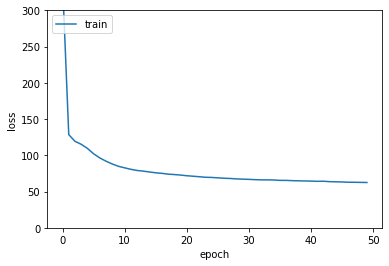

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 300)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
loss = model.evaluate(x_test, [sbp_test, dbp_test], batch_size=16)
print('loss : ' + str(loss))

2581/2581 [==============================] - 2s 767us/step - loss: 1562.5070 - SBP_loss: 1279.6157 - DBP_loss: 282.8943
loss : [1562.5069580078125, 1279.61572265625, 282.89434814453125]


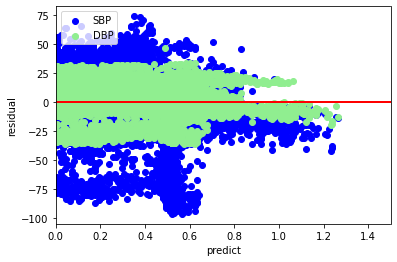

In [20]:
y_pred = model.predict(x_test)
pat_test = x_test.iloc[:,0]
sbp_test_pred = y_pred[0]
dbp_test_pred = y_pred[1]
plt.scatter(pat_test, sbp_test_pred-sbp_test, c='blue', marker='o', label='SBP')
plt.scatter(pat_test, dbp_test_pred-dbp_test, c='lightgreen', marker='o', label='DBP')
plt.xlabel('predict')
plt.ylabel('residual')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([0,1.5])
plt.legend(loc=2)
plt.show()

In [22]:
xhat_idx = [315, 95, 1248]
xhat = x_test.iloc[xhat_idx]
yhat = model.predict(xhat)
shat = sbp_test.iloc[xhat_idx]
dhat = dbp_test.iloc[xhat_idx]

for i in range(3):
    print('True : \n' + str(shat.iloc[i]) + '\n' + str(dhat.iloc[i]))
    print('Predict:\n' + 'SBP   ' + str(yhat[0][i]) + '\nDBP   ' + str(yhat[1][i]))

True : 
SBP    126.1164
Name: 96635, dtype: float64
DBP    72.8835
Name: 96635, dtype: float64
Predict:
SBP   [115.051605]
DBP   [64.79355]
True : 
SBP    124.7784
Name: 96415, dtype: float64
DBP    73.1186
Name: 96415, dtype: float64
Predict:
SBP   [114.35159]
DBP   [63.912067]
True : 
SBP    123.2828
Name: 97568, dtype: float64
DBP    73.0903
Name: 97568, dtype: float64
Predict:
SBP   [115.25069]
DBP   [61.988297]


In [23]:
model.save('ECG_PPG_ABP.h5')